In [ ]:
# Import the machine learning libraries.
import numpy as np
import pandas as pd

from sklearn.model_selection import cross_val_score, GridSearchCV, cross_val_predict, cross_validate, ShuffleSplit, RandomizedSearchCV, learning_curve
from sklearn.metrics import roc_auc_score, roc_curve, auc, confusion_matrix, f1_score, accuracy_score, precision_score, recall_score, classification_report, make_scorer, fbeta_score

import warnings
warnings.filterwarnings("ignore")

In [ ]:
!pip install funcsigs

In [ ]:
from funcsigs import signature
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

In [ ]:
# Load the dataset.
# The dataset can be downloaded here: https://www.kaggle.com/mlg-ulb/creditcardfraud.
df = pd.read_csv('creditcard.csv')
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,1.341262,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.058133,0.068653,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,-1.416907,-0.153826,-0.751063,0.167372,0.050144,-0.443587,0.002821,-0.611987,-0.045575,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,-0.619468,0.291474,1.757964,-1.323865,0.686133,-0.076127,-1.222127,-0.358222,0.324505,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,-0.705117,-0.110452,-0.286254,0.074355,-0.328783,-0.210077,-0.499768,0.118765,0.570328,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,1.017614,0.836390,1.006844,-0.443523,0.150219,0.739453,-0.540980,0.476677,0.451773,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [ ]:
df.tail(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284797,172782.0,-0.241923,0.712247,0.399806,-0.463406,0.244531,-1.343668,0.929369,-0.206210,0.106234,-0.284708,-0.612982,-0.066655,-0.732987,0.237948,-0.293959,-0.245496,-0.174846,-0.891169,-0.290491,-0.139512,-0.228876,-0.514376,0.279598,0.371441,-0.559238,0.113144,0.131507,0.081265,5.49,0
284798,172782.0,0.219529,0.881246,-0.635891,0.960928,-0.152971,-1.014307,0.427126,0.121340,-0.285670,-0.111640,-1.109232,-0.453235,-1.046946,1.122674,1.243518,-1.431897,0.939328,-0.002373,2.894952,0.006666,0.099936,0.337120,0.251791,0.057688,-1.508368,0.144023,0.181205,0.215243,24.05,0
284799,172783.0,-1.775135,-0.004235,1.189786,0.331096,1.196063,5.519980,-1.518185,2.080825,1.159498,-0.594242,-1.264072,0.453596,-0.243142,-0.858719,-0.766554,-0.644646,0.447184,0.388721,0.792135,0.348176,0.103302,0.654850,-0.348929,0.745323,0.704545,-0.127579,0.454379,0.130308,79.99,0
284800,172784.0,2.039560,-0.175233,-1.196825,0.234580,-0.008713,-0.726571,0.017050,-0.118228,0.435402,0.267772,0.523316,0.559047,-0.834660,0.626211,-0.541494,0.225361,-0.605252,-0.163049,0.561695,-0.256922,-0.268048,-0.717211,0.297930,-0.359769,-0.315610,0.201114,-0.080826,-0.075071,2.68,0
284801,172785.0,0.120316,0.931005,-0.546012,-0.745097,1.130314,-0.235973,0.812722,0.115093,-0.204064,-0.657422,0.644837,0.190916,-0.546329,-0.731707,-0.808036,0.599628,0.070441,0.373110,0.128904,0.000676,-0.314205,-0.808520,0.050343,0.102800,-0.435870,0.124079,0.217940,0.068803,2.69,0
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
# Check Null values.
df.isnull().sum().max()

0

In [ ]:
# Count up the Class.
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

Text(0.5, 1.0, 'Class Distributions\n (0: Non-Fraud | 1: Fraud)')

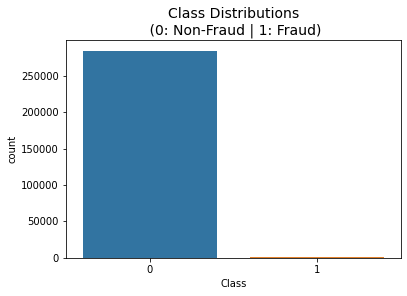

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Display the class distritution.
sns.countplot(x='Class', data=df)
plt.title('Class Distributions\n (0: Non-Fraud | 1: Fraud)', fontsize=14)

In [ ]:
# The classes are heavily skewed.
print('Non-Frauds Transactions:', round(df['Class'].value_counts()[0]/len(df)*100, 2), '% of the dataset')
print('Frauds Transactions:', round(df['Class'].value_counts()[1]/len(df)*100, 2), '% of the dataset')

Non-Frauds Transactions: 99.83 % of the dataset
Frauds Transactions: 0.17 % of the dataset


In [ ]:
from sklearn.preprocessing import StandardScaler
# Apply StandardScaler.
df['ScaledAmount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1,1))
df = df.drop(['Amount','Time'], axis=1)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,ScaledAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [ ]:
# Separate input features and target.
X_ori = df.drop('Class', axis=1)
y_ori = df['Class']

In [ ]:
from sklearn.model_selection import train_test_split
# Split the dataset into the training set and test subsets.
X_train_ori, X_test_ori, y_train_ori, y_test_ori = train_test_split(X_ori, y_ori, test_size=0.25, random_state=7)
print(X_train_ori.shape, X_test_ori.shape, y_train_ori.shape, y_test_ori.shape)

(213605, 29) (71202, 29) (213605,) (71202,)


###**Classification with the Imbalanced Dataset**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
# Create a list of dictionaries for all classifiers used and its parameters.
classifiers = [

{
    'label': 'Logistic Regression Classifier',
    'model': LogisticRegression(),
    'parameters': {"penalty": ['l1', 'l2'], 'C': [0.01, 0.1, 0.5, 1, 10]},
    'r_cv':5,
    'g_cv' : 10,
    'n_iter':10
    
},
{
    'label': 'Support Vector Classifier',
    'model': SVC(),
    'parameters': {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']},
    'r_cv':3,
    'g_cv' : 10,
    'n_iter': 5
},
{
    'label': 'K-Nearest Neighbor',
    'model': KNeighborsClassifier(),
    'parameters':{"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']},
    'r_cv':3,
    'g_cv' : 10,
    'n_iter': 5
},
{
    'label': 'Decision Tree Classifier',
    'model': DecisionTreeClassifier(),
    'parameters': {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))},
    'r_cv':3,
    'g_cv' : 10,
    'n_iter': 5
    
},
{
    'label': 'XGBoost Classifier',
    'model': XGBClassifier(),
    'parameters': { 'learning_rate': [0.01], 'n_estimators':[100,500],
                   'gamma': [0.5, 1, 1.5], 'subsample': [0.6, 0.8, 1.0], 
                   'colsample_bytree': [0.6, 0.8, 1.0], 'max_depth': [2]},
    'r_cv':3,
    'g_cv' : 2,
    'n_iter': 5
    
}
       
]

In [ ]:
def simple_fit_predict(classifiers, X_train, X_test, y_train, y_test):
    """Simple fit-predict to show over-fitting on original data
    
    Arguments:
    
    classifiers: list of Dictionary of classifiers
    X_train: Training set X values
    X_test: Test set X values
    y_train: Training set y values
    y_test: Test set y_values
    
    Returns:
    
    estimators: Dictionary of model estimator objects

    Credits: https://github.com/frincyc
    
    """
    print('Validation Scores:\n')
    estimators = dict()
    for c in classifiers:
        classifier = c['model']
        label = c['label']
        classifier.fit(X_train, y_train)
        train_predictions = classifier.predict(X_train)
        test_predictions = classifier.predict(X_test)
        estimators[label] = classifier
        
        print(label, 'scores')
        print('\n')
        print('Precision:')
        print('Training score: ',round(precision_score(train_predictions,y_train)*100,2),'%', '\t Testing score: ',  round(precision_score(test_predictions,y_test)*100,2),'%')
        print('Recall:')
        print('Training score: ',round(recall_score(train_predictions,y_train)*100,2),'%', '\t Testing score: ',  round(recall_score(test_predictions,y_test)*100,2),'%')
        print('F1 Score:')
        print('Training score: ',round(f1_score(train_predictions,y_train)*100,2),'%', '\t Testing score: ',  round(f1_score(test_predictions,y_test)*100,2),'%')
        print('Accuracy:')
        print('Training score: ',round(accuracy_score(train_predictions,y_train)*100,2),'%', '\t Testing score: ',  round(accuracy_score(test_predictions,y_test)*100,2),'%')
        print('=' *60)
        print('\n')
    return estimators

In [ ]:
initial_estimator = simple_fit_predict(classifiers, X_train_ori, X_test_ori, y_train_ori, y_test_ori)

Validation Scores:

Logistic Regression Classifier scores


Precision:
Training score:  63.11 % 	 Testing score:  55.56 %
Recall:
Training score:  87.17 % 	 Testing score:  86.42 %
F1 Score:
Training score:  73.22 % 	 Testing score:  67.63 %
Accuracy:
Training score:  99.92 % 	 Testing score:  99.91 %


Support Vector Classifier scores


Precision:
Training score:  79.23 % 	 Testing score:  69.05 %
Recall:
Training score:  97.97 % 	 Testing score:  93.55 %
F1 Score:
Training score:  87.61 % 	 Testing score:  79.45 %
Accuracy:
Training score:  99.96 % 	 Testing score:  99.94 %


K-Nearest Neighbor scores


Precision:
Training score:  78.69 % 	 Testing score:  80.95 %
Recall:
Training score:  96.0 % 	 Testing score:  91.89 %
F1 Score:
Training score:  86.49 % 	 Testing score:  86.08 %
Accuracy:
Training score:  99.96 % 	 Testing score:  99.95 %


Decision Tree Classifier scores


Precision:
Training score:  100.0 % 	 Testing score:  78.57 %
Recall:
Training score:  100.0 % 	 Testing scor

#**UnderSampling**

In [ ]:
# Save class-specific indices.
class_0_indices = np.array(df[df['Class']==0].index)
class_1_indices = np.array(df[df['Class']==1].index)
print(class_0_indices.shape, class_1_indices.shape)

(284315,) (492,)


In [ ]:
# Choose class 0 (Non-Fraud) indices randomly to make it equal to class 1 (Fraud).
random_class_0_indices = np.random.choice(a=class_0_indices, size=df[df['Class']==1].count()[0], replace=False)
print(random_class_0_indices.shape)

(492,)


In [ ]:
# New indices of undersampled data.
undersample_indices = np.concatenate([random_class_0_indices, class_1_indices])
print(undersample_indices.shape)

(984,)


In [ ]:
# Undersampled dataset.
df_undersampled = df.iloc[undersample_indices, :]
#print(len(df_undersampled))
print(df_undersampled.shape)

(984, 30)


Text(0.5, 1.0, 'Class Distributions\n (0: Non-Fraud | 1: Fraud)')

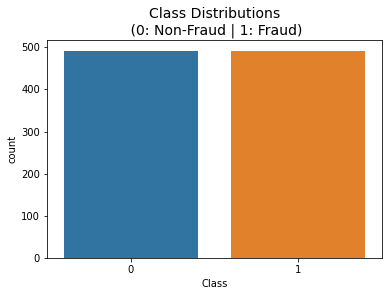

In [ ]:
# Display the class distritution.
sns.countplot(x='Class', data=df_undersampled)
plt.title('Class Distributions\n (0: Non-Fraud | 1: Fraud)', fontsize=14)

In [ ]:
# Split undersampled dataset into independent and dependent variables.
X_undersampled = df_undersampled.iloc[:, df_undersampled.columns!='Class']
y_undersampled = df_undersampled.iloc[:, df_undersampled.columns=='Class']

In [ ]:
# Convert dataframe to numpy array.
X_undersampled = np.array(X_undersampled)
y_undersampled = np.array(y_undersampled).reshape(y_undersampled.shape[0],)

In [ ]:
# Split the dataset into the training set and test subsets.
X_train_undersampled, X_test_undersampled, y_train_undersampled, y_test_undersampled = train_test_split(X_undersampled, y_undersampled, test_size=0.25, random_state=7)
print(X_train_undersampled.shape, X_test_undersampled.shape, y_train_undersampled.shape, y_test_undersampled.shape)

(738, 29) (246, 29) (738,) (246,)


#**Fit the Best Models and Predict**

In [ ]:
def best_estimator(classifiers, X_train, y_train):
    """
    Function that uses Randomized Search CV or GridSearch to fine tune hyper parameters
    
    Arguments:
    
    classifiers: list of Dictionary of classifiers
    X_train: Training set X values
    y_train: Training set y values
         
    Returns:
    
    best_estimators: Dictionary of model estimator objects with best tuned hyper parameters    
    
    """
    
    fbeta = make_scorer(fbeta_score, beta= 0.5)
    
    scoring = {'prec_macro': 'precision_macro',
               'rec_micro': 'recall_micro',
               'acc': 'accuracy',
               'AUC': 'roc_auc',
              'fbeta_score': fbeta}
    best_estimators = dict()
    best_scores = dict()
    
      
    for c in classifiers:
            classifier = c['model']
            label = c['label']
            print('%s Best Values' % (c['label']))
            grid_search = GridSearchCV(estimator = classifier,
                       param_grid = c['parameters'],
                       scoring = scoring,
                       refit='prec_macro',
                       cv = c['g_cv'],
                       return_train_score=True,
                       verbose =1)

            grid_search.fit(X_train, y_train)
            results = grid_search.cv_results_
            print('\n')
            print('Best Precision Score: ',round(grid_search.best_score_*100,2),'%')
            print('Parameters: ',grid_search.best_params_)

            best_estimators[label] = grid_search.best_estimator_
            best_scores[label] = round(grid_search.best_score_*100,2)
            print('%s Optimized scores', label)
            print('---------------------------------------')
            print('\n')
            for key,scorer in scoring.items():
                print('{} scores:\n '.format(scorer))
                #print(results.keys())
                for sample in ('train','test'):
                    sample_score_mean = round(results['mean_%s_%s' % (sample, key)].mean()*100,2)
                    sample_score_std = round(results['std_%s_%s' % (sample, key)].mean()*100,2)
                    if(sample == 'train'):
                        to_print = 'Training'
                    else:
                        to_print = 'Validation'
                    print(to_print,' ',scorer,' : ',sample_score_mean, '% (+/-)', sample_score_std,'%')
                print('\n')

            print('=' *60)
                    
    print('Comparing the best score between Classifiers\n')
    print('\t'.join(['{0}: {1} % \n'.format(k, v) for k,v in best_scores.items()]))
    return best_estimators

In [ ]:
# Find the best hyper parameters using GridSearchCV method ofr undersampled data.
best_estimators = best_estimator(classifiers, X_train_undersampled, y_train_undersampled)

Logistic Regression Classifier Best Values
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.




Best Precision Score:  95.03 %
Parameters:  {'C': 1, 'penalty': 'l2'}
%s Optimized scores Logistic Regression Classifier
---------------------------------------


precision_macro scores:
 
Training   precision_macro  :  nan % (+/-) nan %
Validation   precision_macro  :  nan % (+/-) nan %


recall_micro scores:
 
Training   recall_micro  :  nan % (+/-) nan %
Validation   recall_micro  :  nan % (+/-) nan %


accuracy scores:
 
Training   accuracy  :  nan % (+/-) nan %
Validation   accuracy  :  nan % (+/-) nan %


roc_auc scores:
 
Training   roc_auc  :  nan % (+/-) nan %
Validation   roc_auc  :  nan % (+/-) nan %


make_scorer(fbeta_score, beta=0.5) scores:
 
Training   make_scorer(fbeta_score, beta=0.5)  :  nan % (+/-) nan %
Validation   make_scorer(fbeta_score, beta=0.5)  :  nan % (+/-) nan %


Support Vector Classifier Best Values
Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed:    4.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.




Best Precision Score:  94.94 %
Parameters:  {'C': 0.5, 'kernel': 'linear'}
%s Optimized scores Support Vector Classifier
---------------------------------------


precision_macro scores:
 
Training   precision_macro  :  93.73 % (+/-) 0.43 %
Validation   precision_macro  :  93.27 % (+/-) 2.07 %


recall_micro scores:
 
Training   recall_micro  :  92.75 % (+/-) 0.5 %
Validation   recall_micro  :  92.15 % (+/-) 2.53 %


accuracy scores:
 
Training   accuracy  :  92.75 % (+/-) 0.5 %
Validation   accuracy  :  92.15 % (+/-) 2.53 %


roc_auc scores:
 
Training   roc_auc  :  98.25 % (+/-) 0.31 %
Validation   roc_auc  :  97.6 % (+/-) 1.64 %


make_scorer(fbeta_score, beta=0.5) scores:
 
Training   make_scorer(fbeta_score, beta=0.5)  :  95.83 % (+/-) 0.47 %
Validation   make_scorer(fbeta_score, beta=0.5)  :  95.31 % (+/-) 2.12 %


K-Nearest Neighbor Best Values
Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    9.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.




Best Precision Score:  94.75 %
Parameters:  {'algorithm': 'auto', 'n_neighbors': 3}
%s Optimized scores K-Nearest Neighbor
---------------------------------------


precision_macro scores:
 
Training   precision_macro  :  96.26 % (+/-) 0.27 %
Validation   precision_macro  :  94.53 % (+/-) 1.79 %


recall_micro scores:
 
Training   recall_micro  :  95.95 % (+/-) 0.3 %
Validation   recall_micro  :  94.08 % (+/-) 1.98 %


accuracy scores:
 
Training   accuracy  :  95.95 % (+/-) 0.3 %
Validation   accuracy  :  94.08 % (+/-) 1.98 %


roc_auc scores:
 
Training   roc_auc  :  99.63 % (+/-) 0.04 %
Validation   roc_auc  :  96.01 % (+/-) 1.61 %


make_scorer(fbeta_score, beta=0.5) scores:
 
Training   make_scorer(fbeta_score, beta=0.5)  :  97.86 % (+/-) 0.22 %
Validation   make_scorer(fbeta_score, beta=0.5)  :  96.06 % (+/-) 1.8 %


Decision Tree Classifier Best Values
Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.




Best Precision Score:  92.91 %
Parameters:  {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 5}
%s Optimized scores Decision Tree Classifier
---------------------------------------


precision_macro scores:
 
Training   precision_macro  :  94.37 % (+/-) 0.26 %
Validation   precision_macro  :  92.26 % (+/-) 3.18 %


recall_micro scores:
 
Training   recall_micro  :  93.93 % (+/-) 0.28 %
Validation   recall_micro  :  91.75 % (+/-) 3.36 %


accuracy scores:
 
Training   accuracy  :  93.93 % (+/-) 0.28 %
Validation   accuracy  :  91.75 % (+/-) 3.36 %


roc_auc scores:
 
Training   roc_auc  :  97.3 % (+/-) 0.29 %
Validation   roc_auc  :  95.68 % (+/-) 2.43 %


make_scorer(fbeta_score, beta=0.5) scores:
 
Training   make_scorer(fbeta_score, beta=0.5)  :  96.06 % (+/-) 0.47 %
Validation   make_scorer(fbeta_score, beta=0.5)  :  93.69 % (+/-) 3.07 %


XGBoost Classifier Best Values
Fitting 2 folds for each of 54 candidates, totalling 108 fits


[Parallel(n_jobs=1)]: Done 108 out of 108 | elapsed:   20.5s finished




Best Precision Score:  95.62 %
Parameters:  {'colsample_bytree': 0.6, 'gamma': 0.5, 'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 500, 'subsample': 0.6}
%s Optimized scores XGBoost Classifier
---------------------------------------


precision_macro scores:
 
Training   precision_macro  :  96.72 % (+/-) 0.2 %
Validation   precision_macro  :  94.56 % (+/-) 0.61 %


recall_micro scores:
 
Training   recall_micro  :  96.45 % (+/-) 0.25 %
Validation   recall_micro  :  94.15 % (+/-) 0.67 %


accuracy scores:
 
Training   accuracy  :  96.45 % (+/-) 0.25 %
Validation   accuracy  :  94.15 % (+/-) 0.67 %


roc_auc scores:
 
Training   roc_auc  :  99.42 % (+/-) 0.04 %
Validation   roc_auc  :  97.87 % (+/-) 0.11 %


make_scorer(fbeta_score, beta=0.5) scores:
 
Training   make_scorer(fbeta_score, beta=0.5)  :  98.16 % (+/-) 0.13 %
Validation   make_scorer(fbeta_score, beta=0.5)  :  96.36 % (+/-) 0.51 %


Comparing the best score between Classifiers

Logistic Regression Classifier: 95.03

#**Evaluating the Models**

In [ ]:
# Precision-Recall Curve
def prec_recall_curves(classifiers, best_estimators, X_test, y_test):
    """Helper function to plot Precision-Recall Curve
    
    Arguments:
    
    classifiers: list of Dictionary of classifiers
    best_estimators: Dictionary of estimator objects with best tuned parameters
    X_test: Test set X values
    y_test: Test set y_values
    
   """
    
    color=iter(cm.rainbow(np.linspace(0,15,100)))
    for key, model in best_estimators.items():
        if hasattr(model, "decision_function"):
            y_pred = model.decision_function(X_test)
        else:
            y_pred = model.predict_proba(X_test)[:, 1]
        
        # Generate the precision-recall curve for the classifier:
        precision, recall, thresholds = precision_recall_curve(y_test, y_pred.round())
        
        # Average precision
        average_precision = round(average_precision_score(y_test, y_pred),2)
        
        # Calculate Area under the curve to display on the plot
        # In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
        step_kwargs = ({'step': 'post'}
                       if 'step' in signature(plt.fill_between).parameters
                       else {})
        c=next(color)
        plt.step(recall, precision, color=c, alpha=0.2,
                 where='post', label='%s AP (area = %0.2f) ' % (model.__class__.__name__, average_precision))
        
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.legend(loc = 'best')
    plt.title('Precision-Recall curve')
    plt.show()

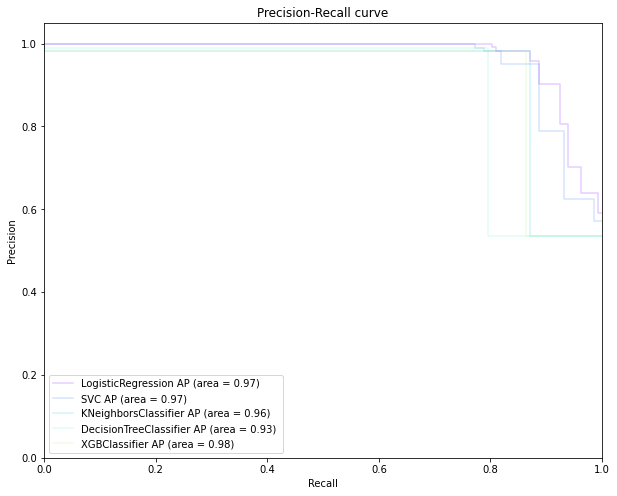

In [ ]:
from matplotlib.pyplot import cm
# Plot Precision-Recall curves.
plt.figure(figsize=(10, 8))
prec_recall_curves(classifiers, best_estimators, X_test_undersampled, y_test_undersampled)

In [ ]:
# Receiver Operating Characteristic Curve (ROC)
def roc_curves(classifiers, best_estimators, X_test, y_test):
    """
    Helper function to plot the ROC Curve
    
    Arguments:
    
    classifiers: list of Dictionary of classifiers
    best_estimators: Dictionary of estimator objects with best tuned parameters
    X_test: Test set X values
    y_test: Test set y_values
    
    """
    
    color=iter(cm.rainbow(np.linspace(0,15,100)))
    for key, model in best_estimators.items():
        y_pred = model.predict(X_test) # predict the test data
        # Compute False postive rate, and True positive rate
        if hasattr(model, "decision_function"):
            y_pred = model.decision_function(X_test)
        else:
            y_pred = model.predict_proba(X_test)[:, 1]
        fpr, tpr, thresholds = roc_curve(y_test, y_pred)
        # Calculate Area under the curve to display on the plot
        auc = roc_auc_score(y_test,y_pred)
        # Now, plot the computed values
        plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (model.__class__.__name__, auc))
    
    # Custom settings for the plot 
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('1-Specificity(False Positive Rate)')
    plt.ylabel('Sensitivity(True Positive Rate)')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

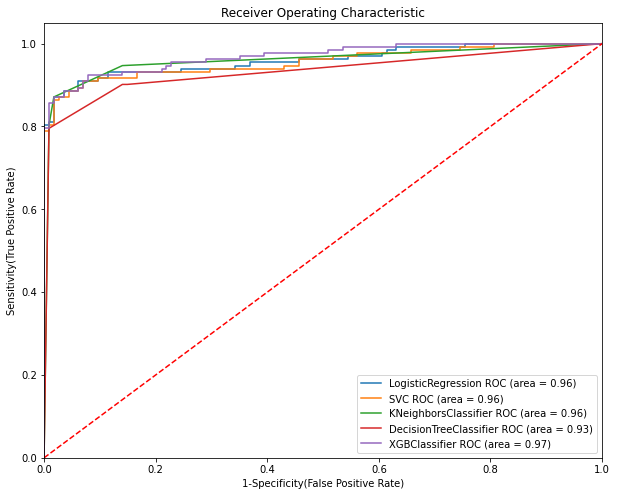

In [ ]:
# Plot the ROC curves.
plt.figure(figsize=(10, 8))
roc_curves(classifiers, best_estimators, X_test_undersampled, y_test_undersampled)

#**OverSampling using SMOTE**

In [ ]:
from imblearn.over_sampling import SMOTE

# Create X and y values using SMOTE Oversampling technique.
X_oversampled, y_oversampled = SMOTE().fit_sample(X_ori, y_ori.values.ravel())

In [ ]:
# Convert into dataframe.
X_oversampled = pd.DataFrame(X_oversampled)
y_oversampled = pd.DataFrame(y_oversampled)

In [ ]:
y_oversampled[0].value_counts()

1    284315
0    284315
Name: 0, dtype: int64

In [ ]:
X_oversampled.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403


In [ ]:
# # Split the dataset into the training set and test subsets.
X_train_oversampled, X_test_oversampled, y_train_oversampled, y_test_oversampled = train_test_split(X_oversampled, y_oversampled, test_size = 0.25, random_state = 7)
print(X_train_oversampled.shape, X_test_oversampled.shape, y_train_oversampled.shape, y_test_oversampled.shape)

(426472, 29) (142158, 29) (426472, 1) (142158, 1)


In [ ]:
# Fit and Predict.
predictions = simple_fit_predict(classifiers, X_train_oversampled, X_test_oversampled, y_train_oversampled, y_test_oversampled)

Validation Scores:

Logistic Regression Classifier scores


Precision:
Training score:  91.7 % 	 Testing score:  91.64 %
Recall:
Training score:  97.37 % 	 Testing score:  97.38 %
F1 Score:
Training score:  94.45 % 	 Testing score:  94.42 %
Accuracy:
Training score:  94.61 % 	 Testing score:  94.58 %


Support Vector Classifier scores


Precision:
Training score:  97.38 % 	 Testing score:  97.35 %
Recall:
Training score:  98.39 % 	 Testing score:  98.34 %
F1 Score:
Training score:  97.89 % 	 Testing score:  97.84 %
Accuracy:
Training score:  97.9 % 	 Testing score:  97.85 %


K-Nearest Neighbor scores


Precision:
Training score:  100.0 % 	 Testing score:  100.0 %
Recall:
Training score:  99.86 % 	 Testing score:  99.81 %
F1 Score:
Training score:  99.93 % 	 Testing score:  99.91 %
Accuracy:
Training score:  99.93 % 	 Testing score:  99.91 %


Decision Tree Classifier scores


Precision:
Training score:  100.0 % 	 Testing score:  99.89 %
Recall:
Training score:  100.0 % 	 Testing score

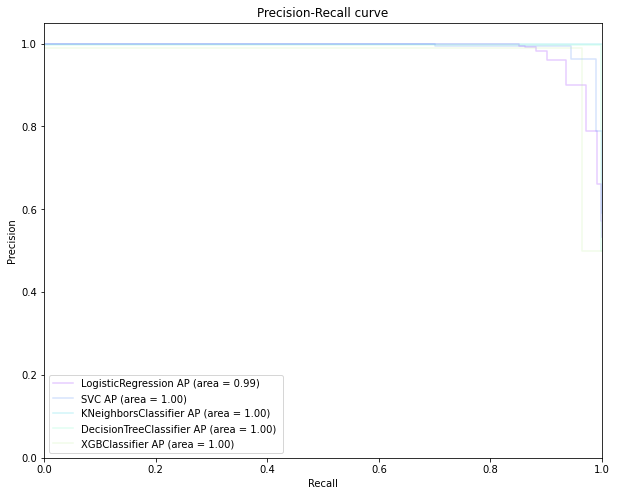

In [ ]:
# Plot Precision-Recall curves.
plt.figure(figsize=(10, 8))
prec_recall_curves(classifiers, predictions, X_test_oversampled, y_test_oversampled)

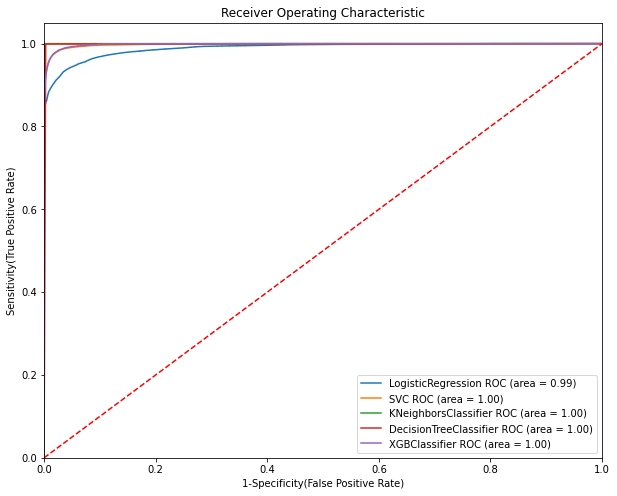

In [ ]:
# Plot the ROC curves.
plt.figure(figsize=(10, 8))
roc_curves(classifiers, predictions, X_test_oversampled, y_test_oversampled)

In [ ]:
def report(best_estimators, X_test, y_test):
    """Helper function to print Classification Report
    
    Arguments:
    
    best_estimators: Dictionary of estimator objects with best tuned parameters
    X_test: Test set X values
    y_test: Test set y_values
    
    """
    for key, model in best_estimators.items():
        y_pred = model.predict(X_test) # predict the test data
        print(model.__class__.__name__)
        print('-' *60)
        print(classification_report(y_test, y_pred, digits = 4))
        print('=' *60)
        print('\n')

In [ ]:
# Classification report.
report(predictions, X_test_oversampled, y_test_oversampled)

LogisticRegression
------------------------------------------------------------
              precision    recall  f1-score   support

           0     0.9210    0.9753    0.9473     71021
           1     0.9738    0.9164    0.9442     71137

    accuracy                         0.9458    142158
   macro avg     0.9474    0.9459    0.9458    142158
weighted avg     0.9474    0.9458    0.9458    142158



SVC
------------------------------------------------------------
              precision    recall  f1-score   support

           0     0.9737    0.9836    0.9786     71021
           1     0.9834    0.9735    0.9784     71137

    accuracy                         0.9785    142158
   macro avg     0.9786    0.9785    0.9785    142158
weighted avg     0.9786    0.9785    0.9785    142158



KNeighborsClassifier
------------------------------------------------------------
              precision    recall  f1-score   support

           0     1.0000    0.9981    0.9991     71021
      

#**Deep Neural Network**

In [ ]:
# Import libraries for Deep learning.
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, CSVLogger

In [ ]:
# ANN model.
model = Sequential([
    Dense(units=16, input_dim=29, activation='relu'),
    Dense(units=24, activation='relu'),
    Dropout(0.5),
    Dense(20, activation='relu'),
    Dense(24, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [ ]:
def ann(model, X_train, X_test, y_train, y_test, data):
    """ Function to fit, predict and evaluate the results
    
    Args:
    
    model: object of ANN model created
    X_train: X values of train set
    X_test: X values of test set
    y_train: y values of train set
    y_test: y values of test set
    data: String to denote if its original/undersampled/oversampled
      
    """
    X_train = np.array(X_train)
    X_test = np.array(X_test)
    y_train = np.array(y_train)
    y_test = np.array(y_test)
    model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
    model.fit(X_train,y_train,batch_size=15,epochs=5)
    y_pred = model.predict(X_test)
    y_pred = (y_pred > 0.5)
    y_test = pd.DataFrame(y_test)
    
    # Making the Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    
    print("\n\nConfusion Matrix\n", cm)
    print("\n\n")
    
 
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred.round())
    average_precision = round(average_precision_score(y_test, y_pred),2)
    step_kwargs = ({'step': 'post'}
                       if 'step' in signature(plt.fill_between).parameters
                       else {})
    #c=next(color)
    plt.step(recall, precision, color='b', alpha=0.2,
                 where='post', label='%s AP (area = %0.2f) ' % ('ANN '+data, average_precision))
        
    plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)   

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.legend(loc = 'best')
    plt.title('Precision-Recall curve')
    print('Artificial Neural Network', data)
    print('-' *60)
    print(classification_report(y_test, y_pred, digits = 4))
    print('=' *60)
    print('\n')

In [ ]:
def classification_report_ann(y_pred, y_test,data):
    print('Artificial Neural Network', data)
    print('-' *60)
    print(classification_report(y_test, y_pred, digits = 4))
    print('+' *60)
    print('\n')

Epoch 1/5
14241/14241 [==============================] - 63s 4ms/step - loss: 0.0069 - accuracy: 0.9991
Epoch 2/5
14241/14241 [==============================] - 63s 4ms/step - loss: 0.0038 - accuracy: 0.9994
Epoch 3/5
14241/14241 [==============================] - 63s 4ms/step - loss: 0.0037 - accuracy: 0.9993
Epoch 4/5
14241/14241 [==============================] - 62s 4ms/step - loss: 0.0034 - accuracy: 0.9994
Epoch 5/5
14241/14241 [==============================] - 57s 4ms/step - loss: 0.0034 - accuracy: 0.9994


Confusion Matrix
 [[71059    17]
 [   23   103]]



Artificial Neural Network Original Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0     0.9997    0.9998    0.9997     71076
           1     0.8583    0.8175    0.8374       126

    accuracy                         0.9994     71202
   macro avg     0.9290    0.9086    0.9186     71202
weighted avg     0.9994    0.9994    0.9994     71202

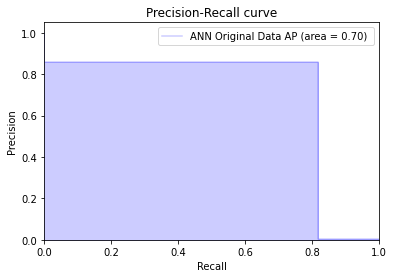

In [ ]:
# Artificial Neural Network on Original Data.
ann(model, X_train_ori, X_test_ori, y_train_ori, y_test_ori, 'Original Data')

#**DNN on the UnderSampled Data**

Epoch 1/5
50/50 [==============================] - 0s 4ms/step - loss: 0.3393 - accuracy: 0.9282
Epoch 2/5
50/50 [==============================] - 0s 4ms/step - loss: 0.1344 - accuracy: 0.9472
Epoch 3/5
50/50 [==============================] - 0s 4ms/step - loss: 0.1267 - accuracy: 0.9526
Epoch 4/5
50/50 [==============================] - 0s 4ms/step - loss: 0.1202 - accuracy: 0.9566
Epoch 5/5
50/50 [==============================] - 0s 4ms/step - loss: 0.1070 - accuracy: 0.9607


Confusion Matrix
 [[114   0]
 [ 19 113]]



Artificial Neural Network Under-Sampled Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0     0.8571    1.0000    0.9231       114
           1     1.0000    0.8561    0.9224       132

    accuracy                         0.9228       246
   macro avg     0.9286    0.9280    0.9228       246
weighted avg     0.9338    0.9228    0.9227       246





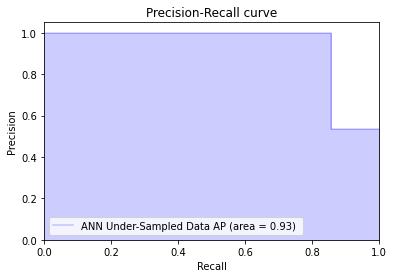

In [ ]:
# Artificial Neural Network on Under-sampled Data.
ann(model, X_train_undersampled, X_test_undersampled, y_train_undersampled, y_test_undersampled, 'Under-Sampled Data')

#**DNN on the OverSampled Data**

Epoch 1/5
28432/28432 [==============================] - 114s 4ms/step - loss: 0.0237 - accuracy: 0.9924
Epoch 2/5
28432/28432 [==============================] - 116s 4ms/step - loss: 0.0103 - accuracy: 0.9974
Epoch 3/5
28432/28432 [==============================] - 117s 4ms/step - loss: 0.0084 - accuracy: 0.9980
Epoch 4/5
28432/28432 [==============================] - 115s 4ms/step - loss: 0.0079 - accuracy: 0.9982
Epoch 5/5
28432/28432 [==============================] - 123s 4ms/step - loss: 0.0069 - accuracy: 0.9984


Confusion Matrix
 [[70831   190]
 [  315 70822]]



Artificial Neural Network Over-Sampled Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0     0.9956    0.9973    0.9964     71021
           1     0.9973    0.9956    0.9964     71137

    accuracy                         0.9964    142158
   macro avg     0.9964    0.9964    0.9964    142158
weighted avg     0.9964    0.9964    0.9964 

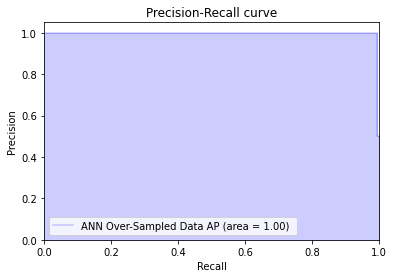

In [ ]:
# Artificial Neural Network on Oversampled Data.
ann(model, X_train_oversampled, X_test_oversampled, y_train_oversampled, y_test_oversampled, 'Over-Sampled Data')